In [81]:
info_dict = {'p':{'Survived':3924,'PID thrown':2675,'No PID thrown': 1249},'ap':{'Survived':6135,'PID thrown':3411,'No PID thrown':2724},'ep':{'Survived':2382,'PID thrown':455,'No PID thrown':1927},'em':{'Survived':2237,'PID thrown':457,'No PID thrown':1780},'kp':{'Survived':2319,'PID thrown':1169,'No PID thrown':1150},'km':{'Survived':2372,'PID thrown':1106,'No PID thrown':1266},'pip':{'Survived':1492,'PID thrown':713,'No PID thrown':779},'pim':{'Survived':1722,'PID thrown':662,'No PID thrown':1060}}

labels = [r'$p$',r'$\bar{p}$',r'$e^{+}$',r'$e^{-}$',r'$K^{+}$',r'$K^{-}$',r'$\pi^{+}$',r'$\pi^{-}$']

keys = []
survived = []
thrown = []
no_thrown = []

for key in info_dict.keys():
    keys.append(key)
    survived.append(info_dict[key]['Survived'])
    thrown.append(info_dict[key]['PID thrown'])
    no_thrown.append(info_dict[key]['No PID thrown'])
        
    print(info_dict[key])

print('\n\n')
print(keys)
print(survived)
print(thrown)
print(no_thrown)

{'Survived': 3924, 'PID thrown': 2675, 'No PID thrown': 1249}
{'Survived': 6135, 'PID thrown': 3411, 'No PID thrown': 2724}
{'Survived': 2382, 'PID thrown': 455, 'No PID thrown': 1927}
{'Survived': 2237, 'PID thrown': 457, 'No PID thrown': 1780}
{'Survived': 2319, 'PID thrown': 1169, 'No PID thrown': 1150}
{'Survived': 2372, 'PID thrown': 1106, 'No PID thrown': 1266}
{'Survived': 1492, 'PID thrown': 713, 'No PID thrown': 779}
{'Survived': 1722, 'PID thrown': 662, 'No PID thrown': 1060}



['p', 'ap', 'ep', 'em', 'kp', 'km', 'pip', 'pim']
[3924, 6135, 2382, 2237, 2319, 2372, 1492, 1722]
[2675, 3411, 455, 457, 1169, 1106, 713, 662]
[1249, 2724, 1927, 1780, 1150, 1266, 779, 1060]


In [82]:
from math import sqrt
err_survived = [sqrt(survive) for survive in survived]
err_thrown = [sqrt(throw) for throw in thrown]

#2.*(err_survive**2)/(survive*10000.)

percentage_survived = [survive/10000 for survive in survived]
err_percentage_survived = [per_survive*sqrt((err_survive**2/survive**2)+(10000./10000.**2)-2.*(err_survive**2)/(survive*10000.)) for per_survive,survive,err_survive in zip(percentage_survived,survived,err_survived)]
print(percentage_survived)
print(err_percentage_survived)
percentage_thrown = [throw/survive for throw,survive in zip(thrown,survived)]
err_percentage_thrown = [per_throw*sqrt((err_survive**2/survive**2)+(err_throw**2/throw**2)-2.*(err_throw**2)/(survive*throw)) for per_survive,survive,err_survive,per_throw,throw,err_throw in zip(percentage_survived,survived,err_survived,percentage_thrown,thrown,err_thrown)]
print(percentage_thrown)
print(err_percentage_thrown)
percentage_thrown_total = [throw/10000 for throw in thrown]
err_percentage_thrown_total = [per_throw_total*sqrt((err_throw**2/throw**2)+(10000./10000.**2)-2.*(err_throw**2)/(throw*10000.)) for per_throw_total,err_throw,throw in zip(percentage_thrown_total,err_thrown,thrown)]
print(percentage_thrown_total)
print(err_percentage_thrown_total)

[0.3924, 0.6135, 0.2382, 0.2237, 0.2319, 0.2372, 0.1492, 0.1722]
[0.004882849987456096, 0.004869473790873095, 0.004259821123005049, 0.004167233014843303, 0.004220454833308846, 0.004253659130677963, 0.0035628550349403785, 0.0037755418154219933]
[0.6817023445463812, 0.5559902200488998, 0.1910159529806885, 0.20429146177916854, 0.5040965933592065, 0.4662731871838111, 0.47788203753351205, 0.38443670150987225]
[0.007436175215215366, 0.006343406760814735, 0.008054413465623517, 0.008524504120863311, 0.010382574421930689, 0.010242887181602385, 0.012931838106804355, 0.011722822971522268]
[0.2675, 0.3411, 0.0455, 0.0457, 0.1169, 0.1106, 0.0713, 0.0662]
[0.004426553399655312, 0.004740788858407427, 0.0020839805661281964, 0.002088336898108157, 0.0032130108932277215, 0.00313636158629709, 0.0025732529996096384, 0.0024863137372423453]


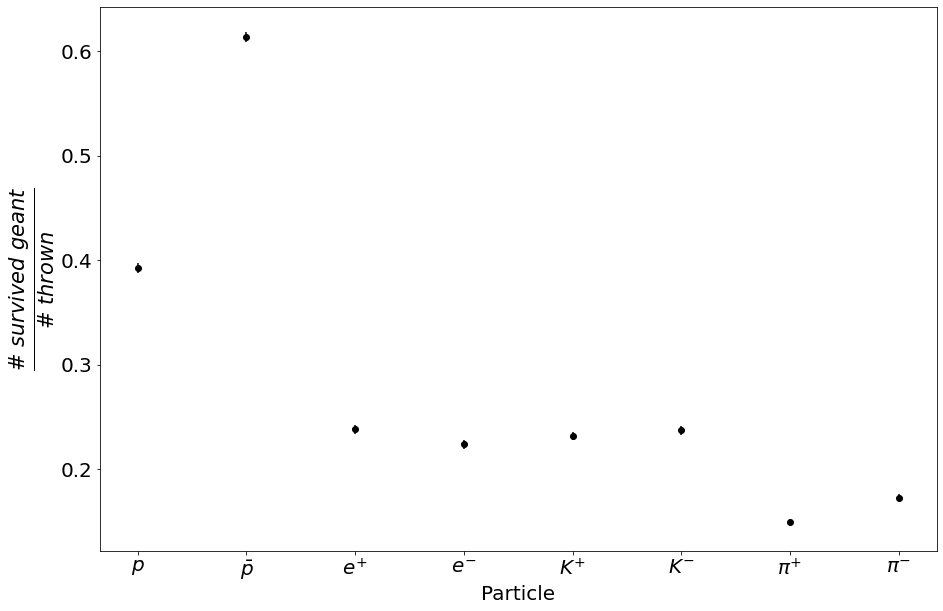

In [145]:
from matplotlib.pyplot import xlabel,ylabel,errorbar,subplots,tight_layout,subplots_adjust

fig,ax = subplots(figsize=(15,10))
ax.errorbar(labels,percentage_survived,yerr=err_percentage_survived,fmt='ko')
ax.set_xlabel(r'Particle',fontsize=20)
ax.set_ylabel(r'$\frac{\# ~survived ~geant}{\# ~thrown}$',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('geant_over_thrown.pdf')

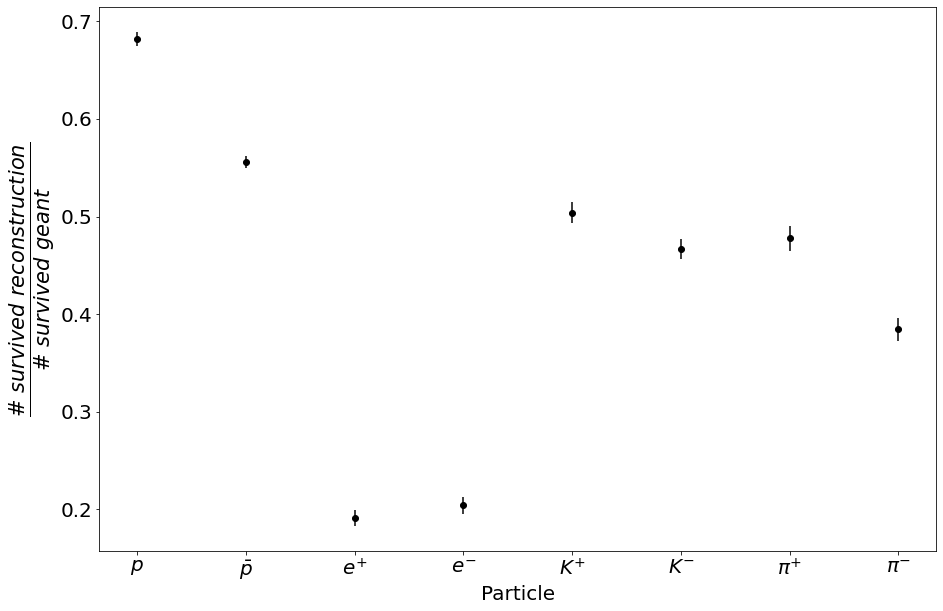

In [142]:
fig,ax = subplots(figsize=(15,10))
ax.errorbar(labels,percentage_thrown,yerr=err_percentage_thrown,fmt='ko')
ax.set_xlabel(r'Particle',fontsize=20)
ax.set_ylabel(r'$\frac{\# ~survived ~reconstruction}{\# ~survived ~geant}$',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('recon_over_geant.pdf')

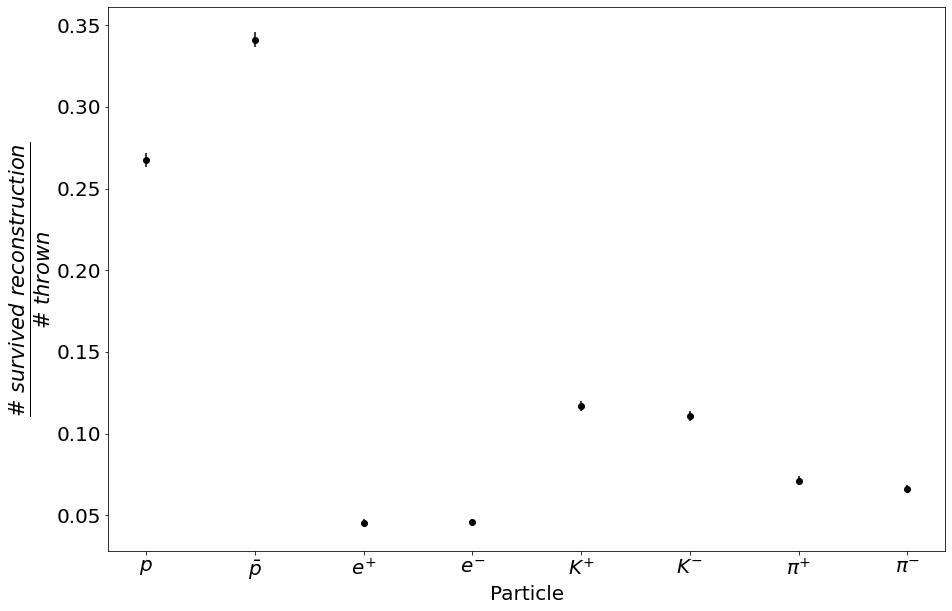

In [143]:
fig,ax = subplots(figsize=(15,10))
ax.errorbar(labels,percentage_thrown_total,yerr=err_percentage_thrown_total,fmt='ko')
ax.set_xlabel(r'Particle',fontsize=20)
ax.set_ylabel(r'$\frac{\# ~survived ~reconstruction}{\# ~thrown}$',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('recon_over_thrown.pdf')

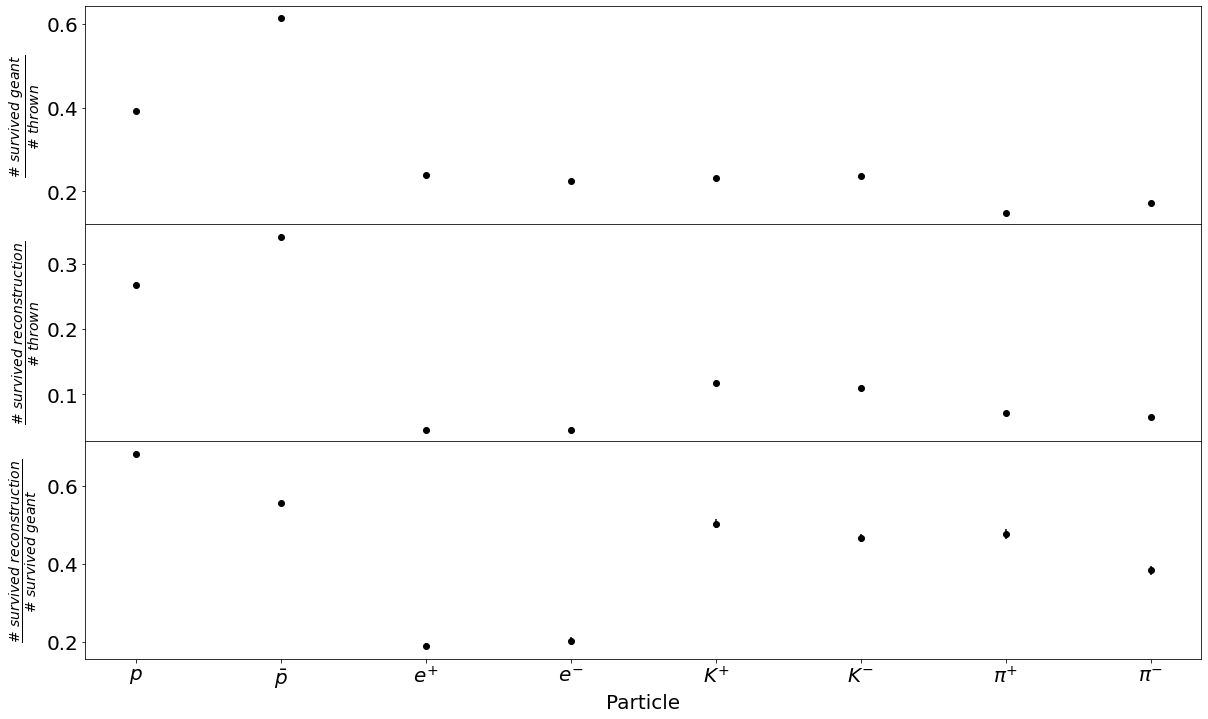

In [171]:
fig,ax = subplots(3,1,figsize=(20,12),sharex=True)

ax[0].errorbar(labels,percentage_survived,yerr=err_percentage_survived,fmt='ko')
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].set_ylabel(r'$\frac{\# ~survived ~geant}{\# ~thrown}$',fontsize=20)

ax[1].errorbar(labels,percentage_thrown_total,yerr=err_percentage_thrown_total,fmt='ko')
ax[1].set_ylabel(r'$\frac{\# ~survived ~reconstruction}{\# ~thrown}$',fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

ax[2].errorbar(labels,percentage_thrown,yerr=err_percentage_thrown,fmt='ko')
ax[2].tick_params(axis='both', which='major', labelsize=20)
ax[2].set_ylabel(r'$\frac{\# ~survived ~reconstruction}{\# ~survived ~geant}$',fontsize=20)
ax[2].set_xlabel(r'Particle',fontsize=20)
tight_layout

subplots_adjust(wspace=0.0,hspace=0.0)

fig.savefig('all_efficiencies.pdf')